# EPIC Institute of Technology
## Data Science Mid-term Exam

# Data

gender.csv

### Objective features:

Age
Height
Weight
Sex (gender)
Measurement results:

Upper and lower blood pressure (ap_hi, ap_lo)
Cholesterol (cholesterol)
Glucose (glucose)

### Subjective features (according to patients):

Smoking (smoke)
Drinking alcohol (alco)
Physical activity (active)
Target sign (which will be interesting to predict):
The presence of cardiovascular diseases according to the results of a classic medical examination (cardio)

Age is given in days.
The values of cholesterol and glucose are represented by one of three classes: normal, above normal, significantly above normal.
The values of subjective features are binary.

All figures are given at the time of inspection.

## Task 0
### Import necesssary libraries and read the data. Note that data is separated with semicolon ';'

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('gender.csv', delimiter=';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Task 1 (2 points) 
### Exploratory Data Analysis (EDA): Create Descriptive Graphs for Initial Data Exploration. 
- Histograms for Age, Height, Weight, ap_hi, and ap_lo to visualize the distribution.
- Bar charts for gender, smoke, alco, and active to show the count of each category.
- Any other graphs that you find useful

In [160]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

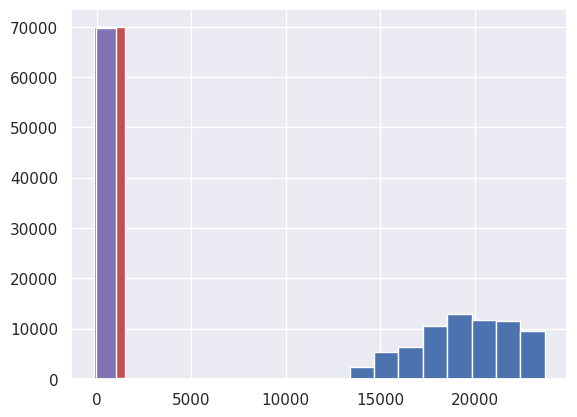

In [161]:
columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for index in columns:
    plt.hist(df[index])

<Axes: ylabel='count'>

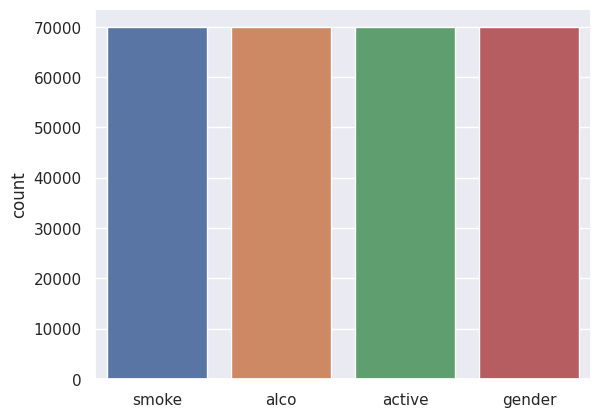

In [162]:
columns = np.array(['smoke', 'alco', 'active', 'gender'])
values = df[['smoke', 'alco', 'active', 'gender']]

sns.countplot(values)


<Axes: >

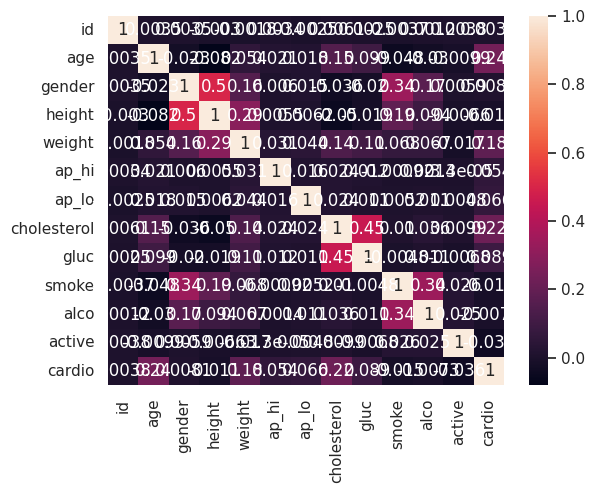

In [163]:
sns.heatmap(df.corr(), annot=True)

## Task 2 (1 point) 
### Data Cleaning: Identify and Remove Outliers in Non-Binary Features
- Identify and remove 5% (both bottom and top) of outliers for non-binary features.
- Identify and remove other inappropriate data (such as negative values)

In [164]:
non_binary = []

for index in df.columns:
    if df[[index]].value_counts().size != 2 and index != 'id':
        non_binary.append(index)
        
print(non_binary)

['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']


In [165]:
df[df < 0] = 0

<Axes: ylabel='age'>

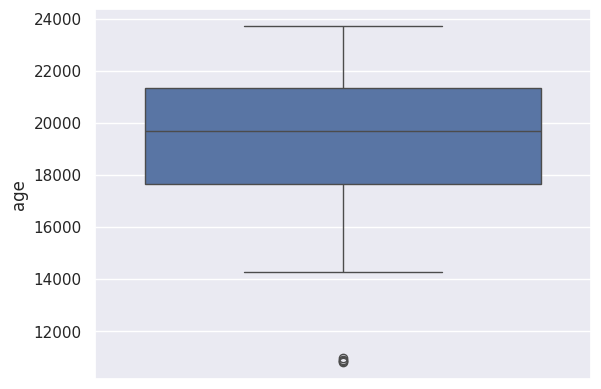

In [166]:
sns.boxplot(data=df['age'])


<Axes: ylabel='height'>

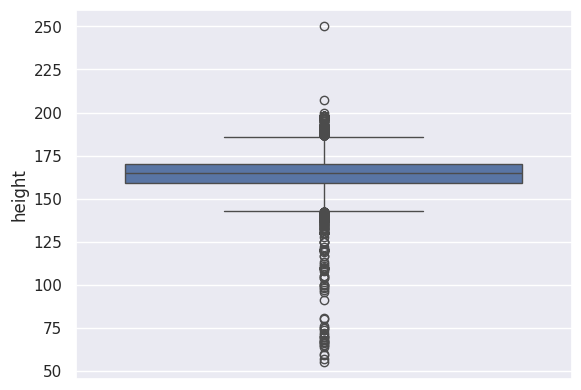

In [167]:
sns.boxplot(data=df['height'])

<Axes: ylabel='weight'>

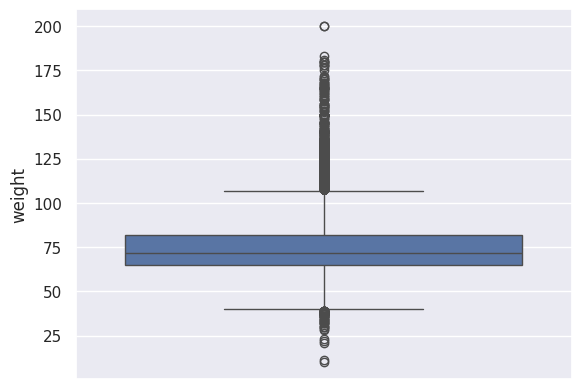

In [168]:
sns.boxplot(data=df['weight'])

<Axes: ylabel='ap_hi'>

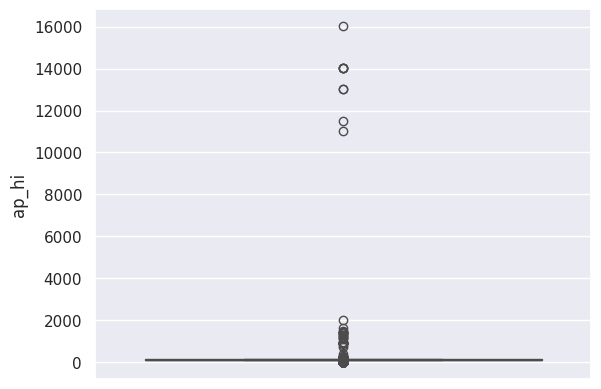

In [169]:
sns.boxplot(data=df['ap_hi'])

<Axes: ylabel='ap_lo'>

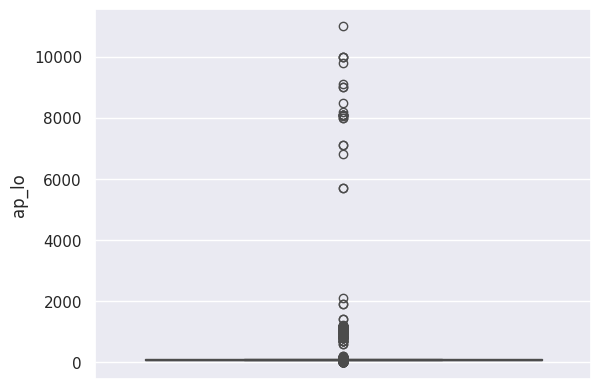

In [170]:
sns.boxplot(data=df['ap_lo'])

<Axes: ylabel='cholesterol'>

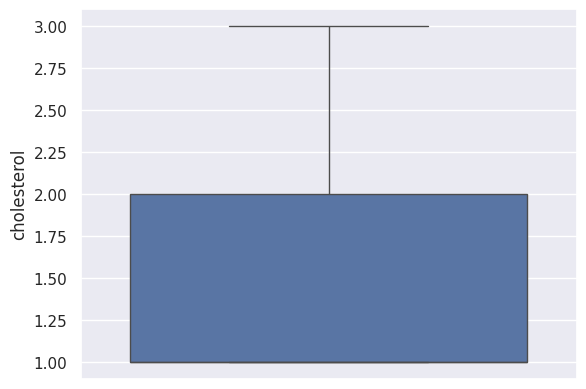

In [171]:
sns.boxplot(data=df['cholesterol'])

<Axes: ylabel='gluc'>

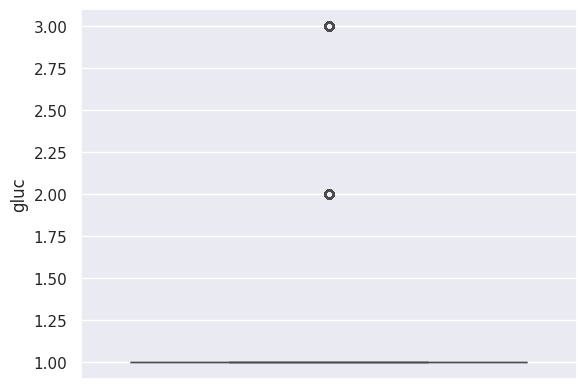

In [172]:
sns.boxplot(data=df['gluc'])

In [173]:
# Remove outliers by normilization
for index in non_binary:
    mn = min(df[index])
    mx = max(df[index])
    df[index] = (df[index] - mn) / (mx - mn)

## Task 3 (1 point)
### Confidence Intervals: Calculate Confidence Intervals for Height and Weight
- After cleaning, calculate the 95% confidence interval for height and 99.7% for weight.

## Task 4 (1 point)
### Data Transformation - One-Hot Encoding:
- Apply one-hot encoding for cholesterol and glucose.

## Task 5 (2 points)
### Hypothesis Testing - T-Test: Investigate Gender Differences in Average Height
- Before conducting the two-tailed t-test to compare the average height between men and women, check for significant differences in variance between the two groups
- If the variance differs significantly, use Welch's t-test

## Task 6 (3 points)
### Model building: Build and Optimize Model for Cardiovascular Disease Prediction
- Select a model of your choice and predict Cardiovascular Disease
- Try different hyperparameters to optimize the model
- Calculate model accuracy

In [174]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.671379,1.349571,0.560817,0.337925,0.008042,0.008785,0.183436,0.113229,0.088129,0.053771,0.803729,0.499700
std,28851.302323,0.191038,0.476838,0.042103,0.075767,0.009613,0.017134,0.340125,0.286135,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,0.531630,1.000000,0.533333,0.289474,0.007491,0.007273,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,0.689508,1.000000,0.564103,0.326316,0.007491,0.007273,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,0.815254,2.000000,0.589744,0.378947,0.008739,0.008182,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active']

X = df[features]
y = df['cardio']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7297142857142858


In [178]:
lm = xgb.XGBClassifier()

lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7357142857142858
